In [1]:
import folium

ModuleNotFoundError: No module named 'folium'

In [2]:
pip install folium pandas geopandas shapely


   ---------------------------------------- 0.0/110.9 kB ? eta -:--:--
   ------------------ --------------------- 51.2/110.9 kB 2.7 MB/s eta 0:00:01
   --------------------- ----------------- 61.4/110.9 kB 656.4 kB/s eta 0:00:01
   -------------------------------- ------ 92.2/110.9 kB 751.6 kB/s eta 0:00:01
   ----------------------------------- -- 102.4/110.9 kB 658.3 kB/s eta 0:00:01
   ----------------------------------- -- 102.4/110.9 kB 658.3 kB/s eta 0:00:01
   ----------------------------------- -- 102.4/110.9 kB 658.3 kB/s eta 0:00:01
   ----------------------------------- -- 102.4/110.9 kB 658.3 kB/s eta 0:00:01
   -------------------------------------- 110.9/110.9 kB 293.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/323.6 kB ? eta -:--:--
   ------- -------------------------------- 61.4/323.6 kB ? eta -:--:--
   ------- -------------------------------- 61.4/323.6 kB ? eta -:--:--
   -------------- ----------------------- 122.9/323.6 kB 722.1 kB/s eta 0:0

In [7]:
import folium

In [8]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

In [9]:
# Load crime data from CSV
crime_data = pd.read_csv(r"C:\Users\abiod\Desktop\GIS file\Crime_Incidents_in_2024.csv")  

In [9]:
# Ensure the dataset contains necessary columns
if not {'LATITUDE', 'LONGITUDE', 'SHIFT', 'METHOD', 'OFFENSE'}.issubset(crime_data.columns):
    raise ValueError("The dataset must contain 'latitude', 'longitude', 'shift', 'method', and 'offence' columns.")


In [13]:
# Convert DataFrame to GeoDataFrame
geometry = [Point(xy) for xy in zip(crime_data['LONGITUDE'], crime_data['LATITUDE'])]
crime_gdf = gpd.GeoDataFrame(crime_data, geometry=geometry, crs="EPSG:4326")


In [14]:
# Define the map center
map_center = [crime_gdf.geometry.y.mean(), crime_gdf.geometry.x.mean()]
crime_map = folium.Map(location=map_center, zoom_start=12)

In [13]:
#script in Jupyter, the map won't display directly. the file need to be generated in HTML file.
print (crime_map)

In [14]:
# Add markers with crime details
for _, row in crime_gdf.iterrows():
    folium.Marker(
        location=[row.geometry.y, row.geometry.x],
        popup=f"Shift: {row['SHIFT']}<br>Method: {row['METHOD']}<br>Offense: {row['OFFENSE']}"
    ).add_to(crime_map)

# Save map to an HTML file
crime_map.save("crime_map.html")

print("Crime map has been generated and saved as crime_map.html")

Crime map has been generated and saved as crime_map.html


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns



In [5]:
print(plt)


<module 'matplotlib.pyplot' from 'C:\\Users\\abiod\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>


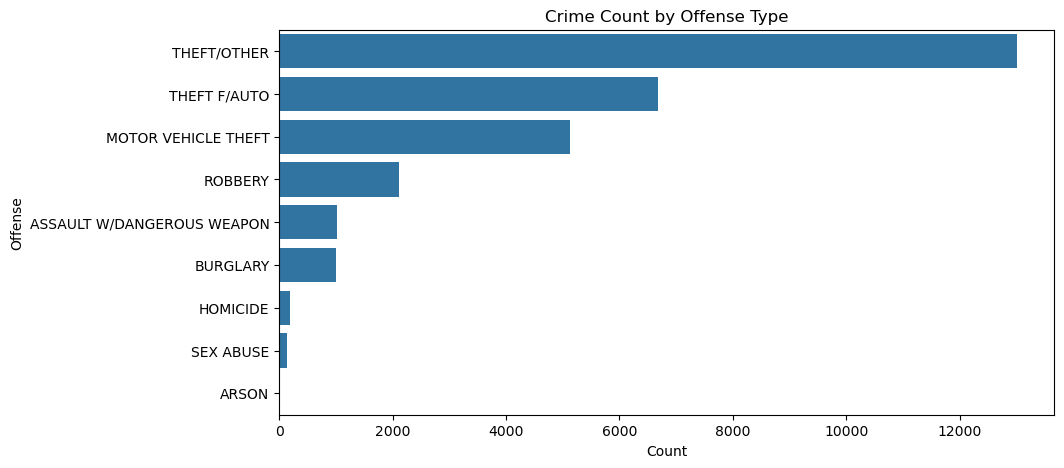

In [10]:
# Data Analysis & Visualization
# Crime Count by Offense Type
plt.figure(figsize=(10, 5))
sns.countplot(y=crime_data['OFFENSE'], order=crime_data['OFFENSE'].value_counts().index)
plt.title('Crime Count by Offense Type')
plt.xlabel('Count')
plt.ylabel('Offense')
plt.show()

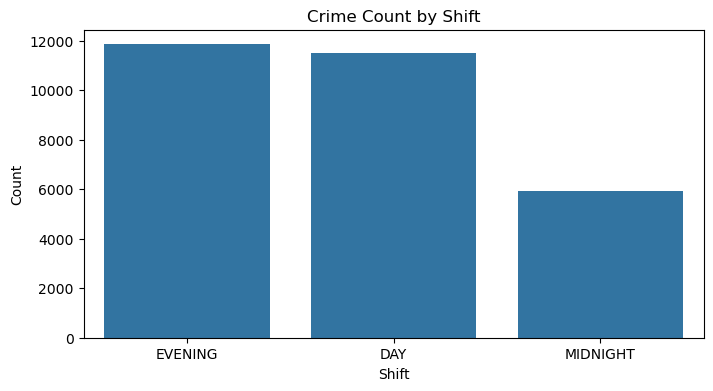

In [16]:
# Crime Count by Shift
plt.figure(figsize=(8, 4))
sns.countplot(x=crime_data['SHIFT'], order=crime_data['SHIFT'].value_counts().index)
plt.title('Crime Count by Shift')
plt.xlabel('Shift')
plt.ylabel('Count')
plt.show()


In [18]:
crime_gdf = crime_gdf.rename(columns={
    "NEIGHBORHOOD_CLUSTER": "NEIGHBORHD",
    "BLOCK_GROUP": "BLOCKGRP",
    "CENSUS_TRACT": "CENSUSTRC",
    "VOTING_PRECINCT": "VOTEPREC",
    "OCTO_RECORD_ID": "OCTORECID"
})
crime_gdf.to_file("crime_data.shp", driver="ESRI Shapefile")


In [20]:
df = pd.read_csv(r"C:\Users\abiod\Desktop\GIS file\Crime_Incidents_in_2024.csv") 

In [21]:
from folium.plugins import HeatMap

# Create a Folium map
crime_map = folium.Map(location=[df['LATITUDE'].mean(), df['LONGITUDE'].mean()], zoom_start=12)

# Add KDE Heatmap
heat_data = list(zip(df['LATITUDE'], df['LONGITUDE']))
HeatMap(heat_data, radius=15).add_to(crime_map)

# Save & Display
crime_map.save("crime_hotspot_map.html")
crime_map


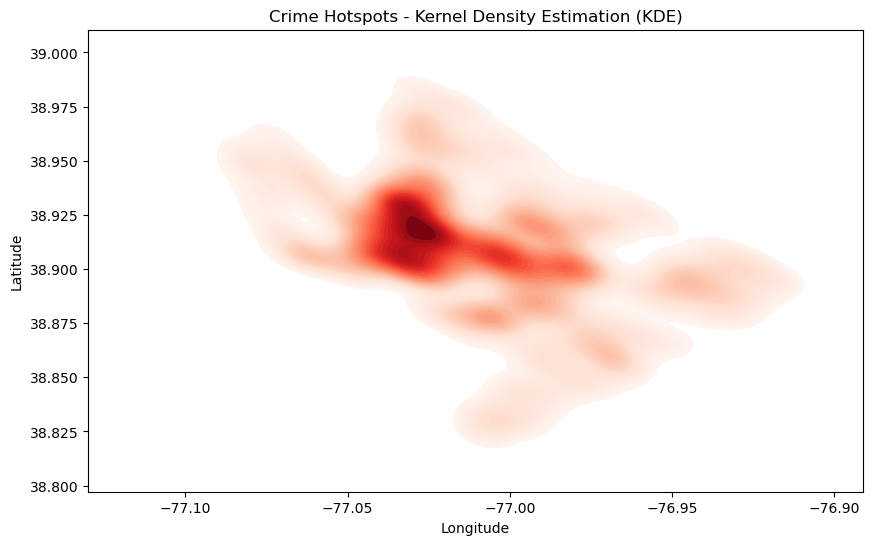

In [24]:
# Create KDE Plot
plt.figure(figsize=(10,6))
sns.kdeplot(x=df['LONGITUDE'], y=df['LATITUDE'], cmap="Reds", fill=True, levels=50)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Crime Hotspots - Kernel Density Estimation (KDE)")
plt.show()

In [25]:
# Temporal Analysis in Python
# Convert 'START_DATE' to datetime format  
df['START_DATE'] = pd.to_datetime(df['START_DATE'])  

# Extract Date Parts (Month, Day, Hour)  
df['Month'] = df['START_DATE'].dt.month  
df['DayOfWeek'] = df['START_DATE'].dt.day_name()  
df['Hour'] = df['START_DATE'].dt.hour  

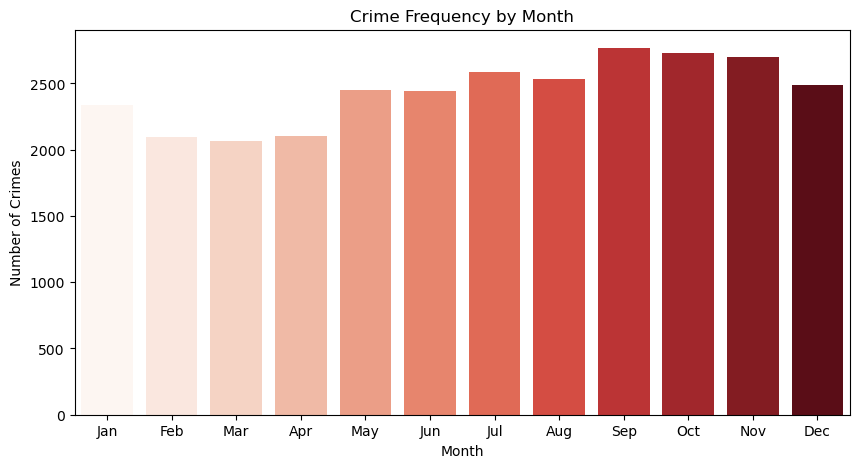

In [27]:
# Most Dangerous Months

plt.figure(figsize=(10, 5))  
sns.countplot(x='Month', data=df, hue='Month', palette='Reds', legend=False)  
plt.title("Crime Frequency by Month")  
plt.xlabel("Month")  
plt.ylabel("Number of Crimes")  
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  
plt.show()  


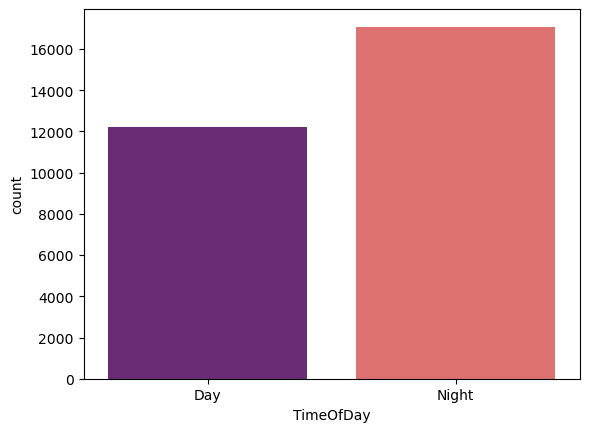

In [29]:
# Day vs Night Crimes
sns.countplot(x='TimeOfDay', data=df, hue='TimeOfDay', palette='magma', legend=False)

plt.show()


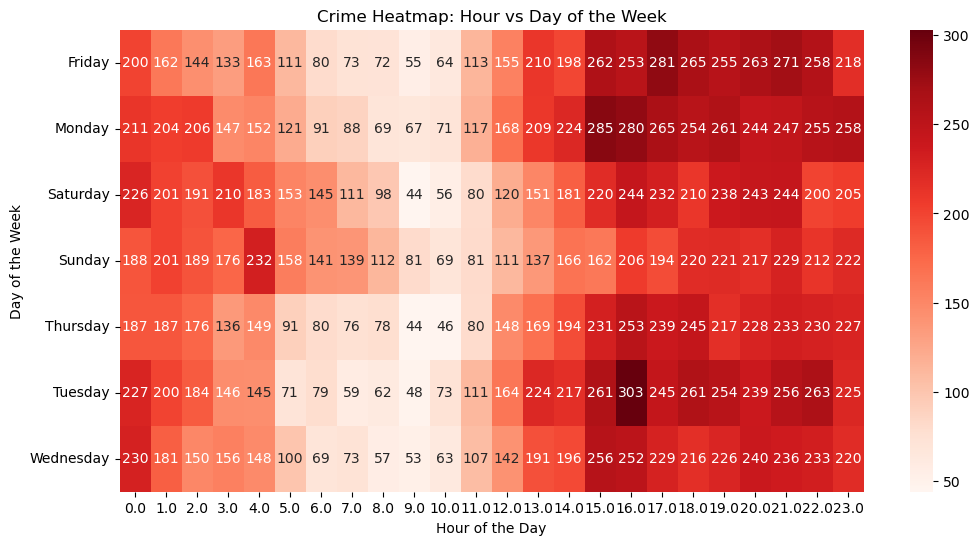

In [31]:
#Crime Heatmap (Hour vs Day)

crime_heatmap = df.pivot_table(index='DayOfWeek', columns='Hour', values='START_DATE', aggfunc='count')

plt.figure(figsize=(12, 6))  
sns.heatmap(crime_heatmap, cmap="Reds", annot=True, fmt=".0f")  
plt.title("Crime Heatmap: Hour vs Day of the Week")  
plt.xlabel("Hour of the Day")  
plt.ylabel("Day of the Week")  
plt.show()  
